# Project Title: Predcting The Survival Of Passenger In Titanic Disaster



# Content Of The Project

    1. Defining the statement problem of the project
    2. Collection of the dataset
    3. Data Exploration Analysis
    4. Feature Engineering 
    5. Feature Selecton
    6. Building the Model
    7. Testing the Model
    8. Reference

# 1. Defining the statement problem of the project

There is a given dataset which contains the information of various passengers involved in the popular Titanic Disaster.we are to draw insight from the dataset, and through that, we will build a Machine Learning model that can predict the chance of survival of each passenger in the Ship using the various Machine Learing  algorithm


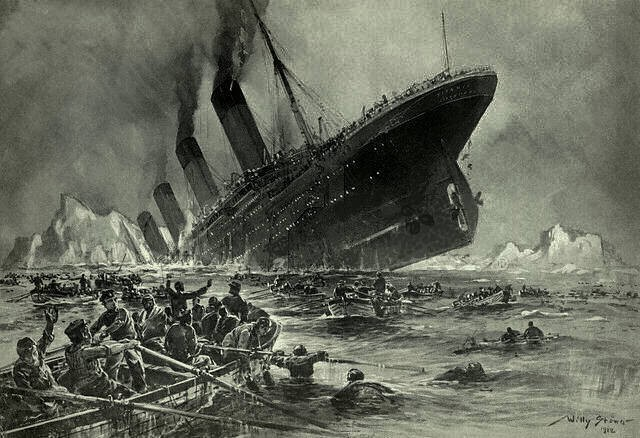

In [1]:
from IPython.display import Image
Image("titanic.jpeg")

# 2. Collection of the dataset

 Both the train and the test dataset were gotten from the kaggle website

.

# loading of the dataset


In [2]:
# Importing The Basic library and set the display of the dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [3]:
# Importing the dataset using pandas

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")

.

# 3. Data Exploration Analysis

In [4]:
# printing the first 5 row of the train dataset
test_df1 = test_df.copy()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# printing the last 5 row of the train dataset

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Dataset Dictionary

PassengeId: numerical indentity of each passenger

Survived: 1 = Survived and 0 = not Survived

Pclass: 1 = 1st Class Ticket, 2 = 2nd Class Ticket and 3 = 3rd Class Ticket

Name: Name of each Passenger

Sex : Gender of each Passenger

Age : Age of of each Passenger

SibSp: Number of sbling of of each Passenger

Parch: Number of Parent of of each Passenger

Ticket: Ticket type

Fare : Cost of obtaining the Ticket

Cabin: Cabin Number

Embarked: Port of Embarktion, C =, S= Southamson

In [6]:
# show the shape of the tain dataset
train_df.shape

(891, 12)

In [7]:
# show the shape of the test dataset
test_df.shape


(418, 11)

In [8]:
# show the columns of the test dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# show the summary of the train dataset
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

from above result it is seen that train dataset consist of 12 columns and 418 rows, and columns like Age, Cabin and Fare Contain null values(Missing values) 

In [10]:
# show the total missing values and its Percentage
t1=train_df.isna().sum().sort_values(ascending=False)
t2= train_df.isna().sum()/ train_df.isna().count() *100
t2 = round(t2, 2).sort_values(ascending=False)
missing_values = pd.concat([t1,t2], keys=["Total", "%"], axis=1)
missing_values.head(12)

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In Cabin column we have total number of 687 missing values which resulted to 77.1%, Age column contain total number of 177 which resulted to 19.87%, Embarked column contain total number of 2 which resulted to 0.22%, The remaining columns has No missing values

.

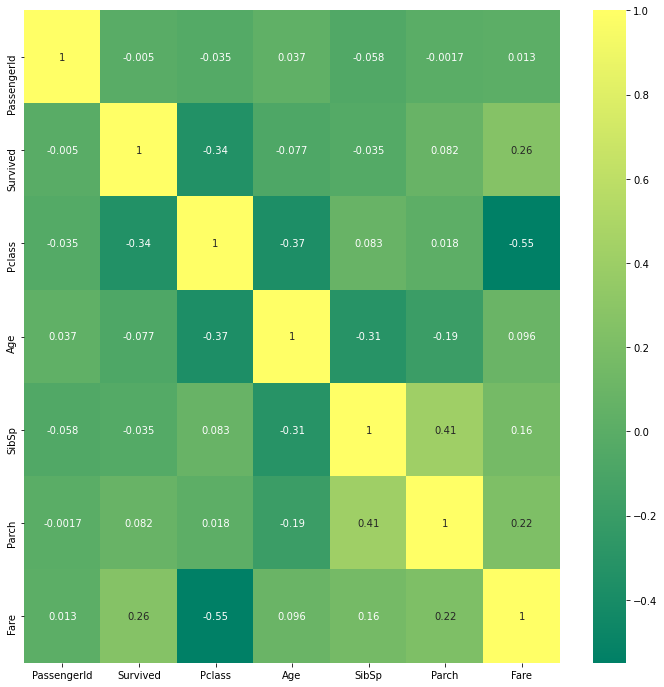

In [11]:
# finding the correlation between the train dataset
cor = train_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data= cor, annot=True, cmap='summer')
plt.show()

As we can see from the above result, Parch and SibSp has the higher correlation. and this make sense as Parent likely to travel with thier children or Spouses

.

# Visualizing each information in train dataset

Here, I will segregate the columns in the dataset into numerical and category features.

In [12]:
train_df_cat =train_df.loc[:, ["Survived", "Pclass", "Sex","Ticket", "Cabin", "Embarked"]]
train_df_num = train_df.loc[:, ["Age","SibSp", "Fare","Parch"]]

# Univaraite Analysis for numerical distribution

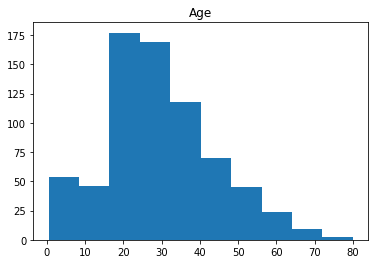

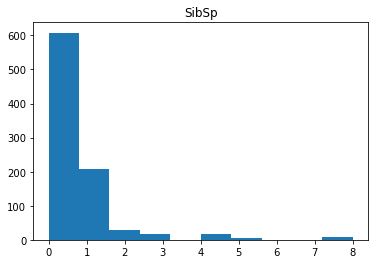

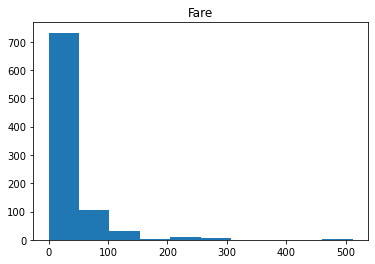

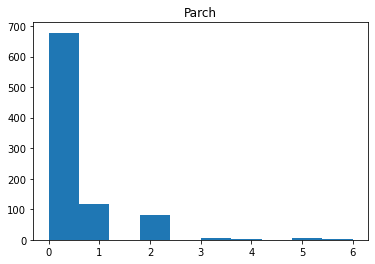

In [13]:
# define a  function for ploting numerical univariate analysis
for dataset in train_df_num:
    plt.hist(train_df_num[dataset])
    plt.title(dataset)
    plt.show()

As it can be seen from above result, Most of the distribution are scatter except for the age  column which is normalize.

# Univaraite Analysis for categorical distribution

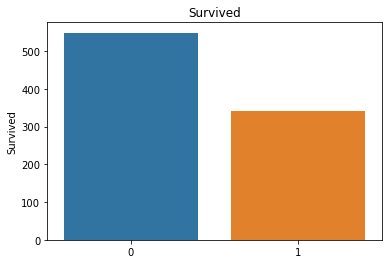

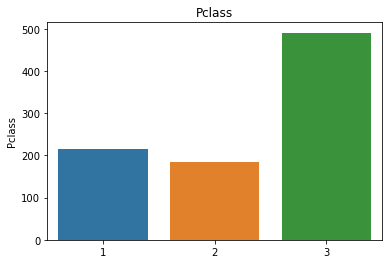

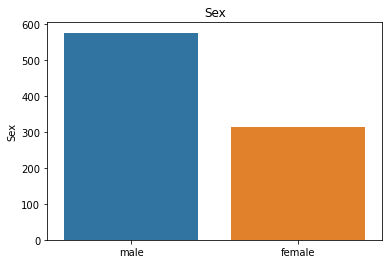

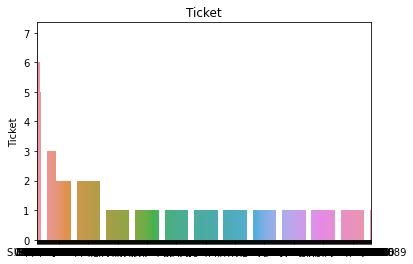

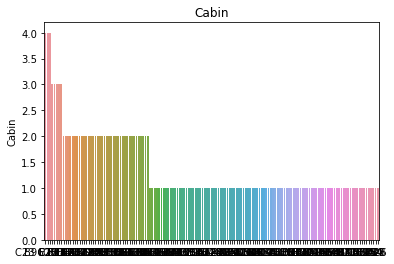

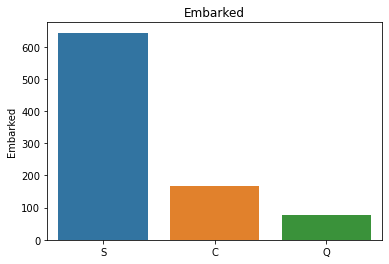

In [14]:
# visualizing the category aspect of the features

for element in train_df_cat.columns:
    sns.barplot(x=train_df_cat[element].value_counts().index,y=train_df_cat[element].value_counts() ).set_title(element)
    plt.show()

# The plot above shows that:
    1. majority of the Passengers die in the ship
    
    2. we have vast number of people in 3rd class than people in 1st and 2nd class has least number of Passengers
    
    3. Most of the passengers were Male
    
    4. Most of the passengers boarded the ship from Southamson
    
the ticket and the cabin columns has no meaning from the plot

In [15]:
# visualizing the numerical aspect of the features in pivot table
pd.pivot_table(data=train_df, index= "Survived", values=train_df_num, aggfunc="mean")

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# The above result show that:

    1. The average Age of people that Survived is 28 years old
    
    2. People that pay high Fare rate (Rich People) Survived most
    
    3. people that has parent are also likely to survived. this make sense as parent will tend to safe their children
    
    4. people that has sibling are likely not to survived, this can be seen as such people will be trying to find and save their relative

# Bi.variance Analysis

In [16]:
# showing the survival rate between the gender
def barplot(x):
    sns.barplot(data=train_df, x=x, y="Survived")
    plt.show()
    
#  defined a function of pivot_table for the distribution
def pivot_table(column):
    result=pd.pivot_table(data=train_df, index= "Survived", columns=list(column), values="Ticket",aggfunc="count")
    return result


# function for barplot
def bar_chart(feature):
    survived= train_df[train_df["Survived"]==1][feature].value_counts()
    dead= train_df[train_df["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead], index= ["survived", "dead"])
    df.plot(kind="bar", stacked=True, figsize=(10,5))
    


None


Sex,female,male
Survived,,
0,81,468
1,233,109


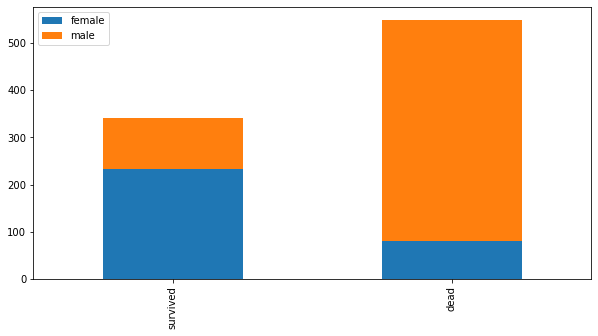

In [17]:
# using barplot to show the relationship between survival and  Sex
print(bar_chart("Sex"))
pivot_table(["Sex"])



Here, it can be see both from the graph-plot and the pivot table that vast majority of people that survived were Female.

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


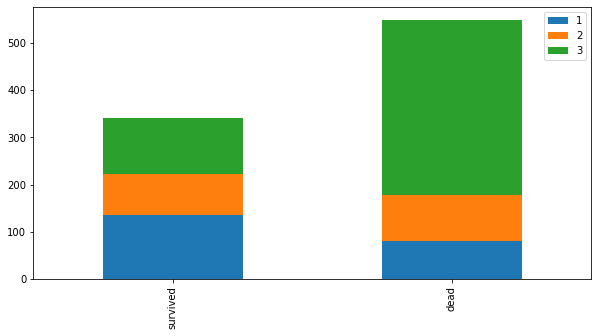

In [18]:
# using barplot to show the relationship between survival Ticket Classes

bar_chart("Pclass")
pivot_table(["Pclass"])

# The above plot show that:
Passengers in 1st class survived more when compare to Passengers in  2nd class. And Passengers in 2nd survived more than Passengers in 3rd class. it can be say that Rich people has high chance of survival

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


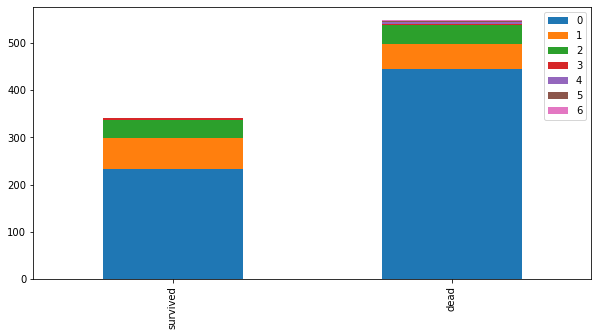

In [19]:
# showing the survival rate of people with or without parent
bar_chart("Parch")
pivot_table(["Parch"])

# The plot above show that:
Passengers with  parent get high chances to survived.

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


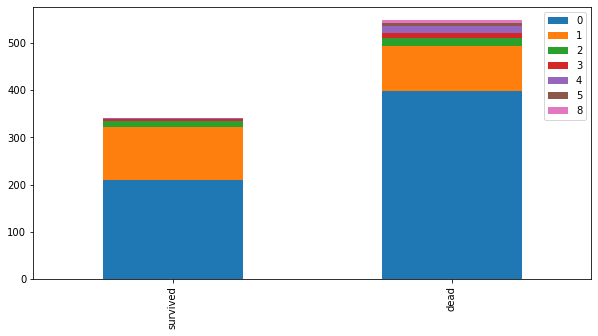

In [20]:
# showing the survival rate of people with or without their relative
bar_chart("SibSp")
pivot_table(["SibSp"])

# The plot above shows that:
Passengers with less relative has better chance of survival

In [21]:
pivot_table([ "Sex", "Pclass"])

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

# 4. Feature Engineering 

- Feature Engineering the process of using domain knowledge to select and transform the most relevant variable from raw data when creating a predictive model inorder to increase the performance and accuracy of the model

In [22]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")

In [23]:
# pringting the first row of the train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4.1 Name column:

-  Here, we will extract the Title of each from passenger from thier Name, then group them in accordant to thier existence, as it might have significant to our modeling, then we will drop the Name drop to avoid overfitting

In [24]:
data = [train_df, test_df]

In [25]:

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset["Title"] = dataset.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
    
# replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)


Title,0,1,2,3,4,5
Survived,,,,,,
0,NaN,436.0,55.0,26.0,17.0,15.0
1,1.0,81.0,130.0,100.0,23.0,7.0


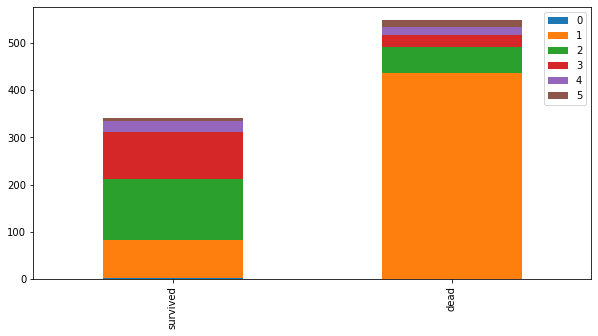

In [26]:
bar_chart("Title")
pivot_table(["Title"])

# The plot above show that:
- Majority of the passengers bear the title of Mr, and vast of them didn't survival

- passengers with title master tent to survival most.

# Sex column

Here we will encode the column using labelencoder since the we are dealing with ordinal categorical

In [27]:
from sklearn.preprocessing import LabelEncoder
for dataset in data:
    ss= LabelEncoder()
    dataset.Sex = ss.fit_transform(dataset["Sex"])

# Age Columns

- Here we will handle the missing values in the column, then bin the age within a range


In [28]:
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,1


In [29]:
# Handling the missing values in Age Columns
for element  in data:
    mean = train_df["Age"].mean() # find the mean of age in train_df
    std = test_df["Age"].std()    # find the std of age in tes_df
    nul = element["Age"].isna().sum() # calculate the size of null in the columns
    ran = np.random.randint(mean-std, mean+std,size= nul) # Generate a random number within the calculated values
    val = element["Age"].copy()
    val[np.isnan(val)] =ran
    element["Age"] = val
    element["Age"] = element["Age"].astype(int) # covert the age into int dtype
element["Age"].isna().sum()

0

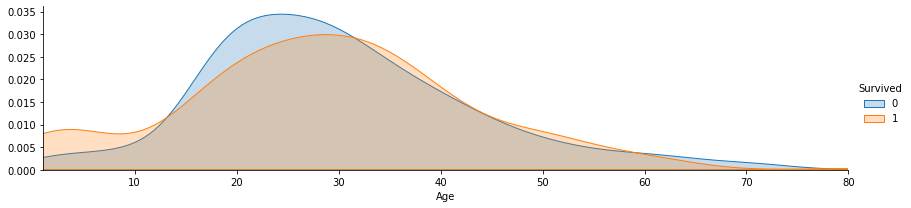

In [30]:
# plot kdeplot of age agaist survived
facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(1, train_df["Age"].max()))
facet.add_legend()
plt.show()

(1.0, 15.0)

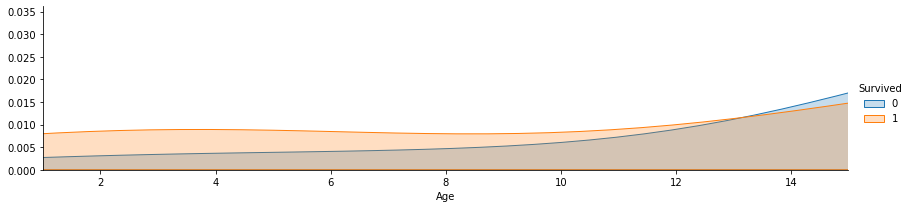

In [31]:
# plot kdeplot of age agaist survived between xlim of 20 and 30

facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train_df["Age"].max()))
facet.add_legend()
plt.xlim(1,15)

# The plot above show that
- Passenger whose age limit  fall within the range 1 year  to 14  years to survival  

(15.0, 30.0)

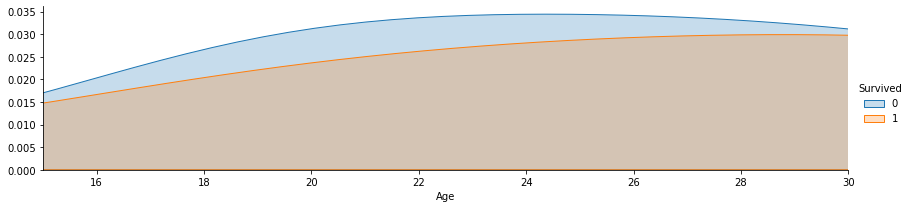

In [32]:
# plot kdeplot of age agaist survived between xlim of 20 and 30

facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train_df["Age"].max()))
facet.add_legend()
plt.xlim(15,30)

# The plot above show that:
- Passengers whose age limit  fall within the range 15  to 30 are likely not to survival  

In [33]:
# Binning the Age
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 62) & (dataset['Age'] <= 100), 'Age']  = 4
    



# Embarked

- Here we will fill the missing values with most frequent, then encode the column using OneHotEncoder

In [34]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

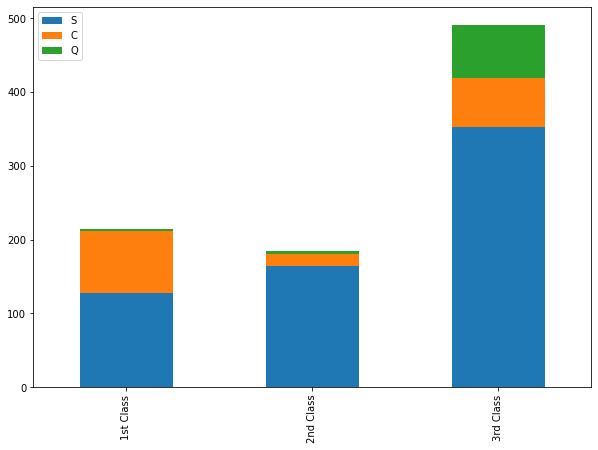

In [35]:
pclass1 = train_df[train_df["Pclass"]==1]["Embarked"].value_counts()
pclass2 = train_df[train_df["Pclass"]==2]["Embarked"].value_counts()
pclass3 = train_df[train_df["Pclass"]==3]["Embarked"].value_counts()
df1 = pd.DataFrame([pclass1, pclass2, pclass3], index= ["1st Class", "2nd Class", "3rd Class"])
df1.plot(kind="bar", stacked=True, figsize=(10,7))
plt.show()

# The plot above show that:
- Passengers that Embarked from Q has highest rate of survival in all the classes of the ship

In [36]:
# fill the missing values with S
for i in data:
    i["Embarked"] = i["Embarked"].fillna("S")

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


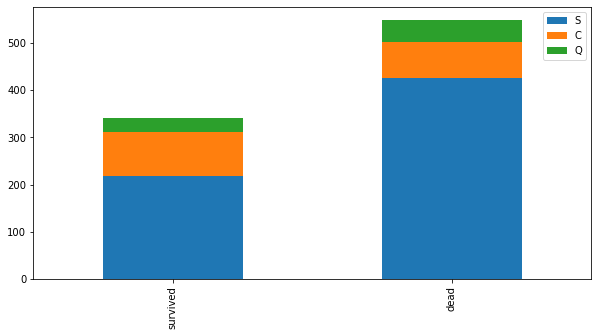

In [37]:
bar_chart("Embarked")
pivot_table(["Embarked"])

# The plot above show that:
- Passengers that Embarked from Q has highest rate of survival 

In [38]:
# Encoding the Emabarked column
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_df.Embarked = ordinal_encoder.fit_transform(train_df[["Embarked"]])
train_df.Embarked = train_df.Embarked.astype(int)

In [39]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,3,1,0,PC 17599,71.2833,C85,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,2,3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,2,0,0,211536,13.0000,NaN,2,5
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,30.0000,B42,2,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,23.4500,NaN,2,2
889,890,1,1,"Behr, Mr. Karl Howell",1,1,0,0,111369,30.0000,C148,0,1


In [40]:
# Encoding the Emabarked column
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
test_df.Embarked = ordinal_encoder.fit_transform(test_df[["Embarked"]])
test_df.Embarked = test_df.Embarked.astype(int)

# Fare

- Here we will fill the missing data by grouping the classes and find the meadian fare of each class

In [41]:
# handling the missing data
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

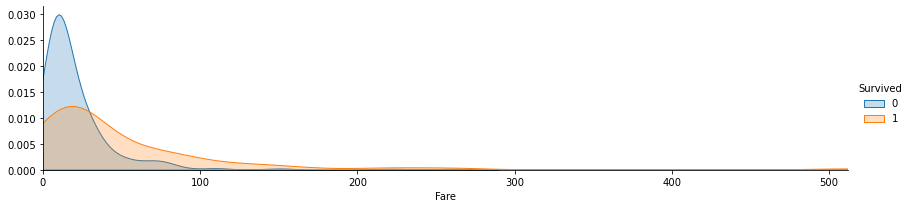

In [42]:
facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, train_df["Fare"].max()))
facet.add_legend()
plt.show()

# The plot above show that:
- The passenger with higher fare survival more when compare to passenger with lower fare

# Cabin
- Here I will extract the letter from the from the number, as the letter indicate the type of the cabin the in ship. I will then encode the column using OneHotEncoder

In [43]:
train_df.Cabin.isna().sum()

687

In [44]:
data= [train_df, test_df]
for dataset in data:
    dataset["Cabin"]= train_df.Cabin.apply(lambda x: str(x)[0])

In [45]:
dataset["Cabin"].value_counts()

n    326
C     32
B     16
D     14
E     11
F      8
A      6
G      4
T      1
Name: Cabin, dtype: int64

In [46]:
cabin_mapping = {"A":0, "B":.4, "C":.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T": 2.8}
for i in data:
    i["Cabin"] = i["Cabin"].map(cabin_mapping)

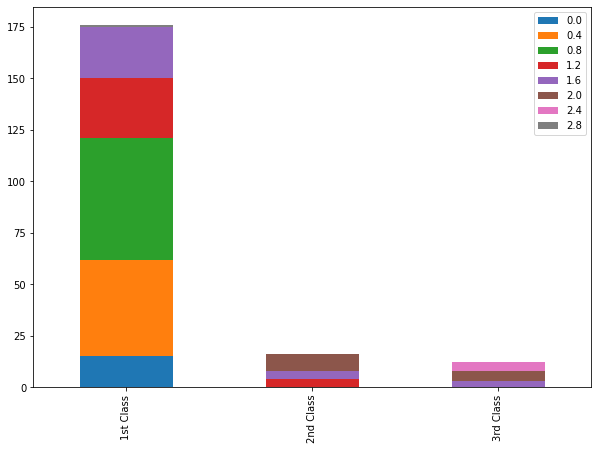

In [47]:
pclass1 = train_df[train_df["Pclass"]==1]["Cabin"].value_counts()
pclass2 = train_df[train_df["Pclass"]==2]["Cabin"].value_counts()
pclass3 = train_df[train_df["Pclass"]==3]["Cabin"].value_counts()
df1 = pd.DataFrame([pclass1, pclass2, pclass3], index= ["1st Class", "2nd Class", "3rd Class"])
df1.plot(kind="bar", stacked=True, figsize=(10,7))
plt.show()

In [48]:
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# Family Size

In [49]:
train_df["familt_size"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["familt_size"] = train_df["SibSp"] + train_df["Parch"] + 1

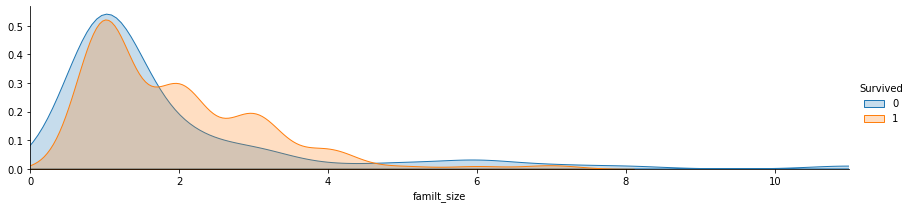

In [50]:
facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "familt_size", shade=True)
facet.set(xlim=(0, train_df["familt_size"].max()))
facet.add_legend()
plt.show()

# Feature Selection

In [51]:
train_df = train_df.drop(['Name',"PassengerId", "Ticket"], axis=1)
test_df = test_df.drop(['Name',"PassengerId", "Ticket"], axis=1)


In [52]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,familt_size
0,0,3,1,1,1,0,7.2500,2.0,2,1,2
1,1,1,0,3,1,0,71.2833,0.8,0,3,2
2,1,3,0,1,0,0,7.9250,2.0,2,2,1
3,1,1,0,2,1,0,53.1000,0.8,2,3,2
4,0,3,1,2,0,0,8.0500,2.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,2,0,0,13.0000,1.8,2,5,1
887,1,1,0,1,0,0,30.0000,0.4,2,2,1
888,0,3,0,1,1,2,23.4500,2.0,2,2,4
889,1,1,1,1,0,0,30.0000,0.8,0,1,1


In [53]:
# Extracting the Features
X = train_df.copy()
y =X.pop("Survived")

In [54]:
X.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
familt_size    0
dtype: int64

In [55]:
from sklearn.feature_selection import mutual_info_classif

mi_score = mutual_info_classif(X,y)
mi_score = pd.Series(mi_score, index=X.columns)
mi_score

Pclass         0.045714
Sex            0.150600
Age            0.029340
SibSp          0.000000
Parch          0.000000
Fare           0.124163
Cabin          0.054244
Embarked       0.043000
Title          0.157359
familt_size    0.026272
dtype: float64

<AxesSubplot:>

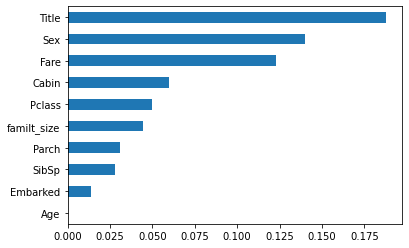

In [57]:
mi_score = mi_score.sort_values()
mi_score.plot(kind="barh")

# Modeling

In [58]:
# importing the classifier Algorithm

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# SVC

In [59]:
from sklearn.model_selection import KFold, cross_val_score

# checking the cross_val_score  SVC

svc = SVC()
n_fold = KFold(n_splits=10, shuffle=True, random_state=0)

svc_score= cross_val_score(svc, X, y, cv=n_fold, n_jobs=1, scoring="accuracy" )

svc_score

array([0.66666667, 0.78651685, 0.68539326, 0.59550562, 0.74157303,
       0.70786517, 0.70786517, 0.71910112, 0.62921348, 0.64044944])

In [60]:
# finding the mean of svc_score 

svc_score =round (svc_score.mean() *100, 2
            )
svc_score

68.8

# DecisionTreeClassifier

In [61]:
# checking the cross_val_score  DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)

DTC_score = cross_val_score(DTC, X, y, cv=n_fold, scoring="accuracy", n_jobs=1)
DTC_score 

array([0.78888889, 0.78651685, 0.79775281, 0.76404494, 0.79775281,
       0.83146067, 0.74157303, 0.7752809 , 0.74157303, 0.80898876])

In [62]:
# finding the mean of DTC_score 

DTC_score =round( DTC_score.mean()* 100, 2)
DTC_score 

78.34

# KNeighborsClassifier

In [63]:
# checking the cross_val_score  KNeighborsClassifier


KNC = KNeighborsClassifier(n_neighbors=13)

KNC_score = cross_val_score(KNC, X, y, cv=n_fold, scoring="accuracy", n_jobs=1)

KNC_score

array([0.72222222, 0.78651685, 0.79775281, 0.69662921, 0.76404494,
       0.73033708, 0.80898876, 0.79775281, 0.75280899, 0.75280899])

In [64]:
# finding the mean of KNC_score 

KNC_score = round(KNC_score.mean() * 100, 2)
KNC_score

76.1

# RandomForestClassifier

In [65]:

# checking the cross_val_score  RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=13, random_state=0)

RFC_score = cross_val_score(RFC, X, y, cv=n_fold, scoring="accuracy", n_jobs=1)
RFC_score

array([0.74444444, 0.83146067, 0.78651685, 0.79775281, 0.78651685,
       0.79775281, 0.80898876, 0.7752809 , 0.76404494, 0.82022472])

In [66]:
# finding the mean of RFC_score 

RFC_score = round(RFC_score.mean()* 100,2)
RFC_score

79.13

# GaussianNB

In [67]:
# checking the cross_val_score  naive_score

naive = GaussianNB()

naive_score = cross_val_score(naive, X,y, cv=n_fold, n_jobs=1, scoring="accuracy")
naive_score

array([0.82222222, 0.74157303, 0.75280899, 0.74157303, 0.74157303,
       0.80898876, 0.73033708, 0.79775281, 0.84269663, 0.80898876])

In [68]:
# finding the mean of naive_score 

naive_score = round(naive_score.mean() * 100, 2)
naive_score

77.89

In [69]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,familt_size
0,3,1,2,0,0,7.8292,0.8,1,1,2
1,3,0,3,1,0,7.0000,0.8,2,3,2
2,2,1,3,0,0,9.6875,0.8,1,1,1
3,3,1,2,0,0,8.6625,0.8,2,1,2
4,3,0,1,1,1,12.2875,0.8,2,3,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,0.8,2,1,1
414,1,0,3,0,0,108.9000,0.8,0,5,1
415,3,1,3,0,0,7.2500,0.8,2,1,1
416,3,1,1,0,0,8.0500,0.8,2,1,3


# Modeling Fitting

In [80]:
from sklearn.model_selection import GridSearchCV

param = {"n_estimators": range(0,200)}

grid = GridSearchCV(RandomForestClassifier(),param, scoring="accuracy", n_jobs=-1, cv=n_fold )

grid = grid.fit(X, y)

In [81]:
grid.best_estimator_

RandomForestClassifier(n_estimators=198)

In [82]:
grid.best_score_

0.8103245942571785

In [83]:
grid.best_params_

{'n_estimators': 198}

In [70]:
my_model = RandomForestClassifier(n_estimators=198)
my_model = my_model.fit(X, y)
my_model

RandomForestClassifier(n_estimators=198)

In [71]:
y_pred =my_model.predict(test_df)

In [72]:
my_model.score(X,y)

0.9551066217732884

In [73]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [74]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,familt_size
0,3,1,2,0,0,7.8292,0.8,1,1,2
1,3,0,3,1,0,7.0000,0.8,2,3,2
2,2,1,3,0,0,9.6875,0.8,1,1,1
3,3,1,2,0,0,8.6625,0.8,2,1,2
4,3,0,1,1,1,12.2875,0.8,2,3,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,0.8,2,1,1
414,1,0,3,0,0,108.9000,0.8,0,5,1
415,3,1,3,0,0,7.2500,0.8,2,1,1
416,3,1,1,0,0,8.0500,0.8,2,1,3


In [75]:
submission = pd.DataFrame({"PassengerId": test_df1["PassengerId"], "Surviver": y_pred})

In [76]:
submission = submission.to_csv("submissions.csv", index=False)

In [96]:
0.9551066217732884

0.9551066217732884